# NXCALS demo

This short NXALS demo was presented during one of the BE-CO technical meetings

### Using one of available query builders select data within time window

In [10]:
from cern.nxcals.pyquery.builders import *

data = DevicePropertyQuery \
            .builder(spark) \
            .system("CMW") \
            .startTime("2018-09-27 00:00:00.000") \
            .endTime("2018-09-28 01:00:00.000") \
            .entity() \
            .parameter("PR.BCT/HotspotIntensity") \
            .buildDataset()         

### Count number of datapoints

In [27]:
data.count()

52546

### Print schema in order to visualize fields

In [13]:
data.printSchema()

root
 |-- __record_timestamp__: long (nullable = true)
 |-- __record_version__: long (nullable = true)
 |-- acqStamp: long (nullable = true)
 |-- class: string (nullable = true)
 |-- cyclestamp: long (nullable = true)
 |-- dcAftEje1: float (nullable = true)
 |-- dcAftEje2: float (nullable = true)
 |-- dcAftInj1: float (nullable = true)
 |-- dcAftInj2: float (nullable = true)
 |-- dcAftTra: float (nullable = true)
 |-- dcBefEje1: float (nullable = true)
 |-- dcBefEje2: float (nullable = true)
 |-- dcBefInj1: float (nullable = true)
 |-- dcBefInj2: float (nullable = true)
 |-- dcBefTra: float (nullable = true)
 |-- device: string (nullable = true)
 |-- nxcals_entity_id: long (nullable = true)
 |-- property: string (nullable = true)
 |-- selector: string (nullable = true)
 |-- timeDcAftEje1: integer (nullable = true)
 |-- timeDcAftEje2: integer (nullable = true)
 |-- timeDcAftInj1: integer (nullable = true)
 |-- timeDcAftInj2: integer (nullable = true)
 |-- timeDcAftTra: integer (nullable

### Print sorted data for selected fields

In [12]:
data.select("cyclestamp",  "selector", "dcBefEje1").sort("cyclestamp").show()

+-------------------+----------------+------------+
|         cyclestamp|        selector|   dcBefEje1|
+-------------------+----------------+------------+
|1538006400700000000|   CPS.USER.ZERO|-0.041096665|
|1538006401900000000|  CPS.USER.EAST2|   400.37088|
|1538006404300000000|   CPS.USER.ZERO| -0.05704462|
|1538006405500000000|CPS.USER.SFTPRO1|   1776.3232|
|1538006406700000000|CPS.USER.SFTPRO1|  -0.1263569|
|1538006407900000000|  CPS.USER.EAST2|   384.58673|
|1538006410300000000|    CPS.USER.TOF|    823.2038|
|1538006411500000000|  CPS.USER.EAST1|   404.01337|
|1538006413900000000|   CPS.USER.ZERO| -0.05459109|
|1538006415100000000|    CPS.USER.MD6| -0.07912641|
|1538006418700000000|   CPS.USER.ZERO|-0.037416365|
|1538006419900000000|CPS.USER.SFTPRO1|   1779.0552|
|1538006421100000000|CPS.USER.SFTPRO1| -0.11654279|
|1538006422300000000|    CPS.USER.TOF|   817.74005|
|1538006423500000000|  CPS.USER.EAST2|   411.90546|
|1538006425900000000|    CPS.USER.TOF|    818.9542|
|15380064271

### Convert data frame to Pandas format
More info about Python Data Analysis Library at: [Pandas site](https://pandas.pydata.org/)

In [25]:
pandasDataFrame = data.select("cyclestamp", "dcBefEje1").sort("cyclestamp").toPandas()

### Show data in the new dataframe format

In [24]:
pandasDataFrame

cyclestamp    dcBefEje1
0      1538006400700000000    -0.041097
1      1538006401900000000   400.370880
2      1538006404300000000    -0.057045
3      1538006405500000000  1776.323242
4      1538006406700000000    -0.126357
5      1538006407900000000   384.586731
6      1538006410300000000   823.203796
7      1538006411500000000   404.013367
8      1538006413900000000    -0.054591
9      1538006415100000000    -0.079126
10     1538006418700000000    -0.037416
11     1538006419900000000  1779.055176
12     1538006421100000000    -0.116543
13     1538006422300000000   817.740051
14     1538006423500000000   411.905457
15     1538006425900000000   818.954224
16     1538006427100000000   398.246063
17     1538006429500000000    -0.056431
18     1538006430700000000   404.013367
19     1538006433100000000    -0.057045
20     1538006434300000000  1776.019775
21     1538006435500000000    -0.128197
22     1538006436700000000   383.676117
23     1538006439100000000   823.507324
24     1538006440300000000   409.173584
25     1538006442700000000    -0.041097
26     1538006443900000000    -0.050297
27     1538006447500000000    -0.063792
28     1538006448700000000  1750.522217
29     1538006449900000000    -0.112862
...                    ...          ...
52516  1538096350300000000    -0.104275
52517  1538096351500000000   418.279785
52518  1538096353900000000   834.131287
52519  1538096355100000000   416.762085
52520  1538096357500000000    -0.030669
52521  1538096361100000000    -0.049071
52522  1538096362300000000  1755.682373
52523  1538096363500000000  1741.416016
52524  1538096364700000000    -0.066245
52525  1538096365900000000   839.291504
52526  1538096367100000000   411.905457
52527  1538096369500000000   836.559570
52528  1538096370700000000   413.423126
52529  1538096373100000000    -0.014721
52530  1538096374300000000   399.156708
52531  1538096376700000000  1764.485229
52532  1538096377900000000  1764.485229
52533  1538096379100000000    -0.080967
52534  1538096380300000000   410.387756
52535  1538096382700000000   837.773804
52536  1538096383900000000   414.940857
52537  1538096386300000000    -0.030669
52538  1538096389900000000    -0.044164
52539  1538096391100000000  1774.805420
52540  1538096392300000000  1751.736328
52541  1538096393500000000    -0.085874
52542  1538096394700000000   828.667542
52543  1538096395900000000   407.048798
52544  1538096398300000000   827.453369
52545  1538096399500000000   413.726685

[52546 rows x 2 columns]

### Visualize using matplotlib
More info about python plotting library at: [Matplotlib site](https://matplotlib.org/)

<IPython.core.display.Javascript object>


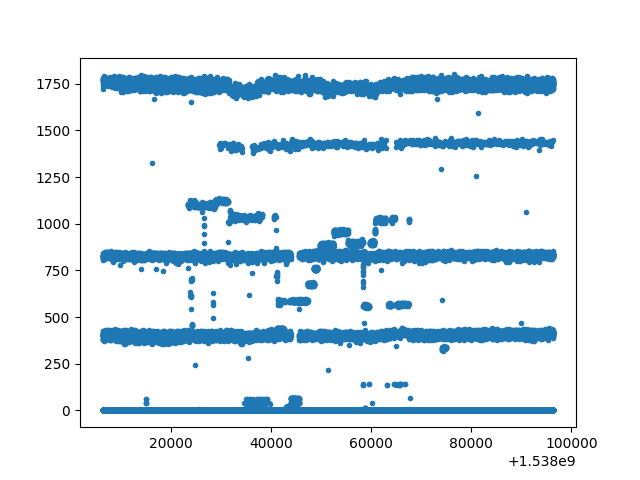

In [26]:
%matplotlib notebook
import matplotlib.pyplot as pl
t1,v1=pandasDataFrame.values.T
t1/=1e9 # to seconds
pl.clf()
pl.plot(t1,v1,'.')


### Using the same builder select some TGM data

In [17]:
tgmData = DevicePropertyQuery.builder(spark).system("CMW") \
                     .startTime("2018-08-01 00:00:00.000")\
                     .endTime("2018-08-01 01:00:00.000") \
                     .entity()\
                     .parameter("CPS.TGM/FULL-TELEGRAM.STRC") \
                     .buildDataset()
                
tgmData.printSchema()

root
 |-- BATCH: integer (nullable = true)
 |-- BEAMID: integer (nullable = true)
 |-- BPNM: integer (nullable = true)
 |-- COMLN: struct (nullable = true)
 |    |-- elements: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- dimensions: array (nullable = true)
 |    |    |-- element: integer (containsNull = true)
 |-- CYCLE: integer (nullable = true)
 |-- CYTAG: integer (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST2: string (nullable = true)
 |-- DURN: integer (nullable = true)
 |-- FREE14: integer (nullable = true)
 |-- FREE4: integer (nullable = true)
 |-- MISC: struct (nullable = true)
 |    |-- elements: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- dimensions: array (nullable = true)
 |    |    |-- element: integer (containsNull = true)
 |-- MISC_A: struct (nullable = true)
 |    |-- elements: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- dimens

### Using Spark SQL DataFrame API perform some SQL oparations directly on the dataframe

In [18]:
joined = tgmData.join(data, "cyclestamp") \
.select("USER", "DEST", "cyclestamp","dcBefEje1") \
.sort("cyclestamp")

joined.show()

+-------+-------+-------------------+------------+
|   USER|   DEST|         cyclestamp|   dcBefEje1|
+-------+-------+-------------------+------------+
|    TOF|   NTOF|1533081600700000000|   686.03864|
|  EAST2| EAST_N|1533081601900000000|   308.79346|
|    TOF|   NTOF|1533081604300000000|   690.60205|
|  EAST2| EAST_N|1533081605500000000|   310.61884|
|SFTPRO1|FTARGET|1533081607900000000|   1364.7758|
|SFTPRO1|FTARGET|1533081609100000000|   1341.0458|
|   LHC2| TT2_D3|1533081610300000000|   130.10347|
|   ZERO|PS_DUMP|1533081612700000000| -0.08173305|
|   ZERO|PS_DUMP|1533081613900000000| -0.05509413|
|   ZERO|PS_DUMP|1533081615100000000|-0.058726706|
|   ZERO|PS_DUMP|1533081616300000000|-0.068413585|
|   ZERO|PS_DUMP|1533081617500000000|-0.051461548|
|    TOF|   NTOF|1533081618700000000|    664.4383|
|  EAST1|EAST_T8|1533081619900000000|    320.3542|
|SFTPRO1|FTARGET|1533081622300000000|   1371.7731|
|SFTPRO1|FTARGET|1533081623500000000|   1360.2123|
|   ZERO|PS_DUMP|15330816247000

In [19]:
joined.where("DEST = 'LHC' and USER != 'LHCPROBE'").show()


+----+----+-------------------+------------+
|USER|DEST|         cyclestamp|   dcBefEje1|
+----+----+-------------------+------------+
|LHC2| LHC|1533082998700000000|   143.46223|
|LHC2| LHC|1533083002300000000|  -0.0121086|
|LHC2| LHC|1533083005900000000| -0.01937376|
|LHC2| LHC|1533083035900000000|   149.04614|
|LHC2| LHC|1533083039500000000| -0.02240091|
|LHC2| LHC|1533083043100000000| -0.03390408|
|LHC2| LHC|1533083073100000000|   143.49268|
|LHC2| LHC|1533083076700000000| -0.01997919|
|LHC2| LHC|1533083080300000000|  -0.0302715|
|LHC2| LHC|1533083110300000000|    151.2371|
|LHC2| LHC|1533083113900000000|-0.027849779|
|LHC2| LHC|1533083117500000000| -0.02361177|
|LHC2| LHC|1533083147500000000|   144.72508|
|LHC2| LHC|1533083151100000000|   145.01418|
|LHC2| LHC|1533083154700000000|   141.75816|
|LHC2| LHC|1533083184700000000|   145.22717|
|LHC2| LHC|1533083188300000000|   141.14955|
|LHC2| LHC|1533083191900000000|   143.87305|
|LHC2| LHC|1533083221900000000|    145.3641|
|LHC2| LHC

In [20]:
joined.where("DEST = 'LHC' and USER != 'LHCPROBE'").registerTempTable("myData")

spark.sql("select count(*) as LHC_NO_BEAM_COUNT from myData where dcBefEje1 <= 0").show()

+-----------------+
|LHC_NO_BEAM_COUNT|
+-----------------+
|               16|
+-----------------+

